# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | peniche
Processing Record 3 of Set 1 | belaya gora
Processing Record 4 of Set 1 | safford
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | madera
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | douchy-les-mines
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | alugan
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | wanning
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | turukhansk
Processing Record 23 of S

Processing Record 42 of Set 4 | atar
Processing Record 43 of Set 4 | rungata
City not found. Skipping...
Processing Record 44 of Set 4 | mercedes
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | marabba
Processing Record 48 of Set 4 | kaithal
Processing Record 49 of Set 4 | barcelos
Processing Record 0 of Set 5 | suntar
Processing Record 1 of Set 5 | mount gambier
Processing Record 2 of Set 5 | tucupita
Processing Record 3 of Set 5 | kavieng
Processing Record 4 of Set 5 | shache
Processing Record 5 of Set 5 | sioux lookout
Processing Record 6 of Set 5 | cayenne
Processing Record 7 of Set 5 | saint-philippe
Processing Record 8 of Set 5 | cortez
Processing Record 9 of Set 5 | komsomolskiy
Processing Record 10 of Set 5 | kruisfontein
Processing Record 11 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 5 | gornoye loo
Processing Record 13 of Set 5 | norman wells
Proc

Processing Record 26 of Set 8 | mantua
Processing Record 27 of Set 8 | singaparna
Processing Record 28 of Set 8 | helena
Processing Record 29 of Set 8 | prainha
Processing Record 30 of Set 8 | husavik
Processing Record 31 of Set 8 | kodiak
Processing Record 32 of Set 8 | te anau
Processing Record 33 of Set 8 | coquimbo
Processing Record 34 of Set 8 | ust-ishim
Processing Record 35 of Set 8 | birr
Processing Record 36 of Set 8 | aquiraz
Processing Record 37 of Set 8 | faanui
Processing Record 38 of Set 8 | yerofey pavlovich
Processing Record 39 of Set 8 | nikel
Processing Record 40 of Set 8 | kargasok
Processing Record 41 of Set 8 | hervey bay
Processing Record 42 of Set 8 | saint-joseph
Processing Record 43 of Set 8 | dudinka
Processing Record 44 of Set 8 | geraldton
Processing Record 45 of Set 8 | kapuskasing
Processing Record 46 of Set 8 | la ronge
Processing Record 47 of Set 8 | mamit
Processing Record 48 of Set 8 | dzaoudzi
Processing Record 49 of Set 8 | samarai
Processing Record 

Processing Record 12 of Set 12 | riyadh
Processing Record 13 of Set 12 | sibiti
Processing Record 14 of Set 12 | brae
Processing Record 15 of Set 12 | dicabisagan
Processing Record 16 of Set 12 | gat
Processing Record 17 of Set 12 | kaoma
Processing Record 18 of Set 12 | celestun
Processing Record 19 of Set 12 | hyeres
Processing Record 20 of Set 12 | jalu
Processing Record 21 of Set 12 | aktash
Processing Record 22 of Set 12 | eirunepe
Processing Record 23 of Set 12 | nhulunbuy
Processing Record 24 of Set 12 | grand gaube
Processing Record 25 of Set 12 | bundaberg
Processing Record 26 of Set 12 | marzuq
Processing Record 27 of Set 12 | gollere
City not found. Skipping...
Processing Record 28 of Set 12 | villa bruzual
Processing Record 29 of Set 12 | puerto madryn
Processing Record 30 of Set 12 | antalaha
Processing Record 31 of Set 12 | teshie
Processing Record 32 of Set 12 | lewisporte
Processing Record 33 of Set 12 | pakokku
Processing Record 34 of Set 12 | conceicao do araguaia
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,70.18,91,100,1.99,ZA,1675807397
1,peniche,39.3558,-9.3811,49.44,76,4,7.11,PT,1675807397
2,belaya gora,68.5333,146.4167,-46.50,100,96,2.57,RU,1675807182
3,safford,32.8340,-109.7076,58.75,24,75,8.01,US,1675807405
4,chuy,-33.6971,-53.4616,75.85,66,0,10.78,UY,1675807406


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,70.18,91,100,1.99,ZA,1675807397
1,peniche,39.3558,-9.3811,49.44,76,4,7.11,PT,1675807397
2,belaya gora,68.5333,146.4167,-46.50,100,96,2.57,RU,1675807182
3,safford,32.8340,-109.7076,58.75,24,75,8.01,US,1675807405
4,chuy,-33.6971,-53.4616,75.85,66,0,10.78,UY,1675807406


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

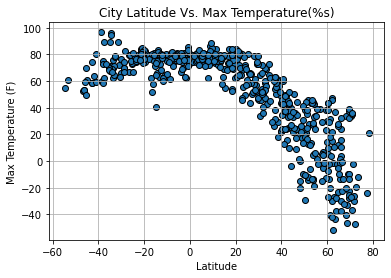

In [9]:
# Build scatter plot for latitude vs. temperature

x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis,y_axis, edgecolor="black", linewidth=1, marker="o", alpha=1.0, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()


#### Latitude Vs. Humidity

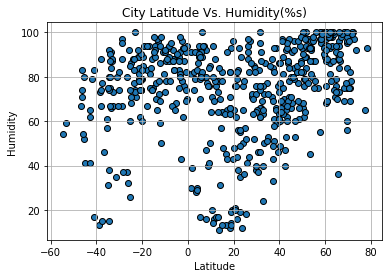

In [10]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis,y_axis, edgecolor="black", linewidth=1, marker="o", alpha=1.0, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

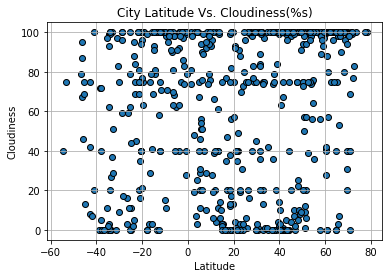

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis,y_axis, edgecolor="black", linewidth=1, marker="o", alpha=1.0, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

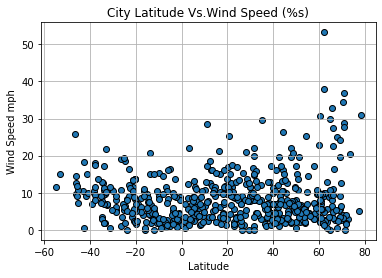

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis,y_axis, edgecolor="black", linewidth=1, marker="o", alpha=1.0, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs.Wind Speed (%s)")
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,peniche,39.3558,-9.3811,49.44,76,4,7.11,PT,1675807397
2,belaya gora,68.5333,146.4167,-46.50,100,96,2.57,RU,1675807182
3,safford,32.8340,-109.7076,58.75,24,75,8.01,US,1675807405
7,madera,37.1666,-119.8343,62.76,84,74,3.27,US,1675807393
9,ponta do sol,32.6667,-17.1000,60.01,63,13,4.54,PT,1675807413


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,70.18,91,100,1.99,ZA,1675807397
4,chuy,-33.6971,-53.4616,75.85,66,0,10.78,UY,1675807406
5,mataura,-46.1927,168.8643,52.48,83,87,9.78,NZ,1675807406
6,busselton,-33.6500,115.3333,62.69,84,27,9.62,AU,1675807406
8,mar del plata,-38.0023,-57.5575,75.22,88,40,18.01,AR,1675807118


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.852635587342209


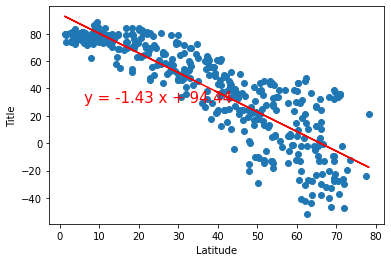

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.3334219828106544


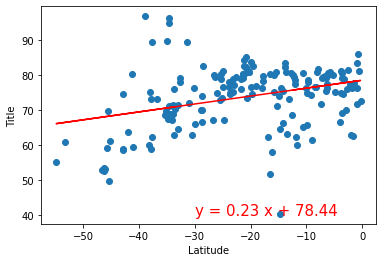

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.43355369453471454


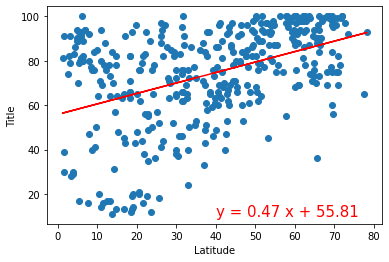

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.4222161748485024


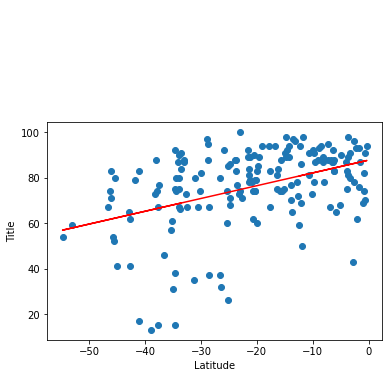

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.25285715915322377


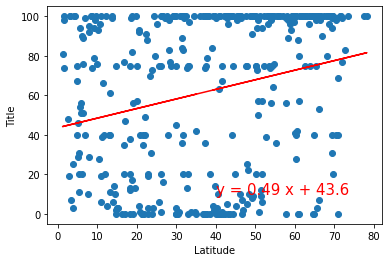

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.35083447692417524


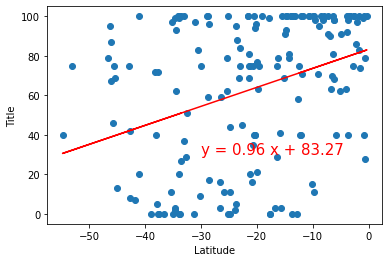

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0963118214789228


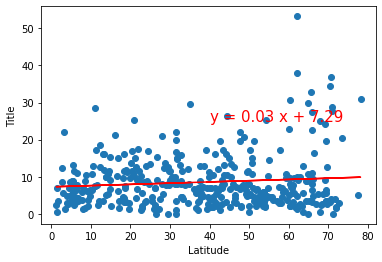

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.3784331512986635


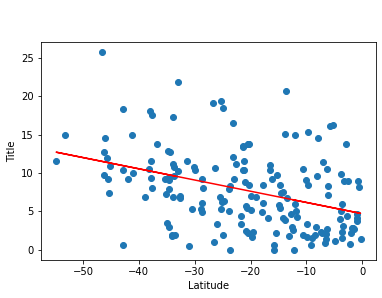

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))